In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv('/content/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [8]:
data.isnull().sum().sum()

0

In [9]:
data.duplicated().sum()

0

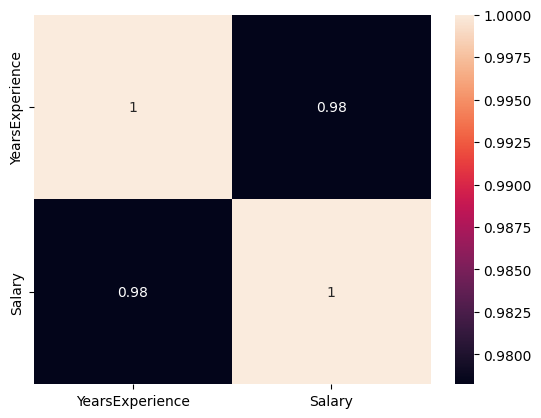

In [10]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

<ipython-input-11-ba31c982e612>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


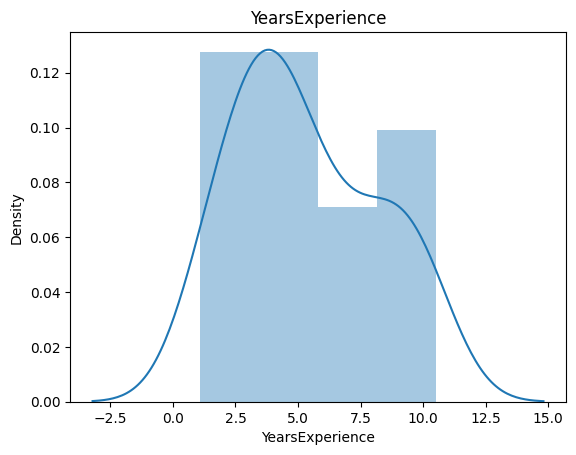

<ipython-input-11-ba31c982e612>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


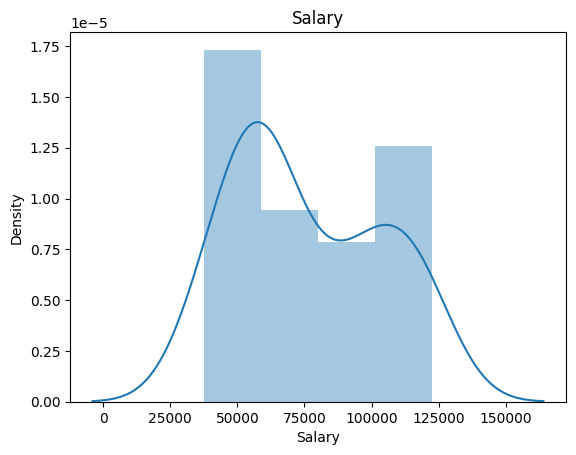

In [11]:
for i in data.columns:
  if data[i].dtypes != 'object':
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

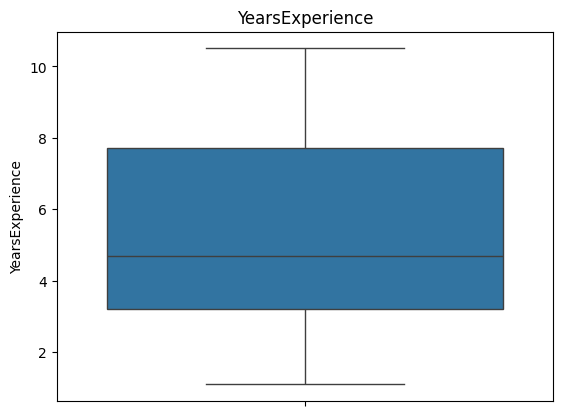

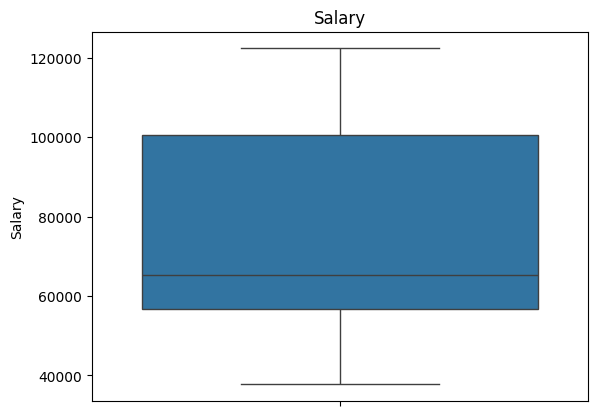

In [12]:
for i in data.columns:
  if data[i].dtypes != 'object':
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [13]:
x = data.drop(['Salary'],axis=1)
y = data['Salary']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
predict = lr.predict(x_test)
predict

array([74335.18140771, 53694.77314164, 81840.78441356, 76211.58215917,
       64014.97727468, 40559.96788141])

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,predict)*100

86.4302042082409

In [20]:
err_predict = pd.DataFrame(columns=['Actual','Predict'])
err_predict['Actual'] = y_test
err_predict['Predict'] = predict
err_predict['err_rate'] = err_predict['Actual'] - err_predict['Predict']
err_predict

,Actual,Predict,err_rate
16,66029,74335.181408,-8306.181408
5,56642,53694.773142,2947.226858
18,81363,81840.784414,-477.784414
17,83088,76211.582159,6876.417841
11,55794,64014.977275,-8220.977275
2,37731,40559.967881,-2828.967881


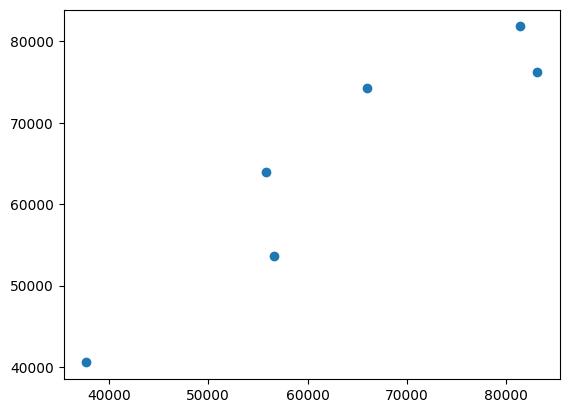

In [22]:
plt.scatter(x=y_test,y=predict)
plt.show()

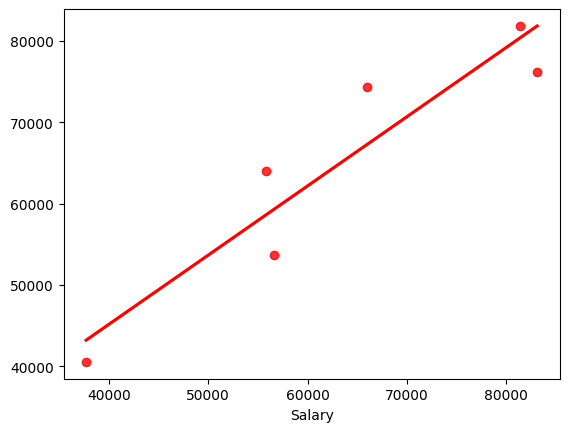

In [24]:
sns.regplot(x=y_test,y=predict,ci=None,color='red')
plt.show()

In [25]:
slope = lr.coef_
intercept = lr.intercept_
print("slope:",slope)
print("intercept:",intercept)

slope: [9382.00375731]
intercept: 26486.962245449446


In [26]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [28]:
lr.predict([[5.7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([79964.3836621])